In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

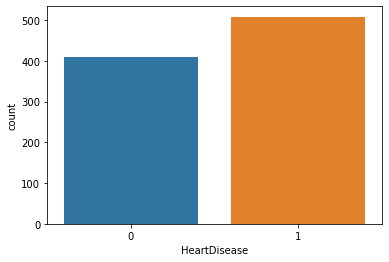

In [7]:
# Seaborn countplot gives the number of data in the each class
sns.countplot(x="HeartDisease", data=df)

In [8]:
arr = df["RestingECG"].unique()
  
# printing array
print(arr)

['Normal' 'ST' 'LVH']


In [9]:
df.loc[df["ST_Slope"] == "Up", "ST_Slope"] = 1
df.loc[df["ST_Slope"] == "Flat", "ST_Slope"] = 0
df.loc[df["ST_Slope"] == "Down", "ST_Slope"] = -1


In [10]:
df.loc[df["ChestPainType"] == "ATA", "ChestPainType"] = 1
df.loc[df["ChestPainType"] == "NAP", "ChestPainType"] = 0
df.loc[df["ChestPainType"] == "ASY", "ChestPainType"] = 2
df.loc[df["ChestPainType"] == "TA", "ChestPainType"] = 3


In [11]:
df.loc[df["RestingECG"] == "Normal", "RestingECG"] = 1
df.loc[df["RestingECG"] == "ST", "RestingECG"] = 0
df.loc[df["RestingECG"] == "LVH", "RestingECG"] = -1

In [12]:
df.loc[df["ExerciseAngina"] == "N", "ExerciseAngina"] = 0
df.loc[df["ExerciseAngina"] == "Y", "ExerciseAngina"] = 1

In [13]:
df.loc[df["Sex"] == "M", "Sex"] = 1
df.loc[df["Sex"] == "F", "Sex"] = 0

In [14]:
df["ST_Slope"] = pd.to_numeric(df["ST_Slope"])
df["Sex"] = pd.to_numeric(df["Sex"])
df["ChestPainType"] = pd.to_numeric(df["ChestPainType"])
df["ExerciseAngina"] = pd.to_numeric(df["ExerciseAngina"])
df["RestingECG"] = pd.to_numeric(df["RestingECG"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [16]:
y = df.HeartDisease.values
# This means that take target data out from the datasets and assign them to x_data variable
x_data = df.drop(["HeartDisease"],axis=1)

In [17]:

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [18]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
# Here lr.score first predict the y_test and then gives the accuracy
print("test accuracy {}".format(lr.score(x_test,y_test)))

lr_score=lr.score(x_test,y_test)

test accuracy 0.8478260869565217


C:\Users\Nidhi Kochar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# Here we use confusion matrix to evaluate the logistic regression algorithm
from sklearn.metrics import confusion_matrix
y_prediction = lr.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)


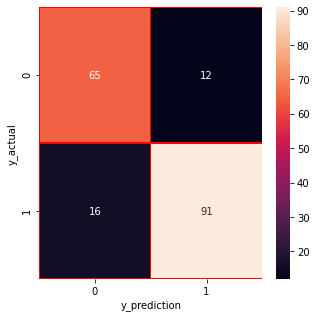

In [21]:
# Heatmap visualization of cunfusion matrix of Logistic regression model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

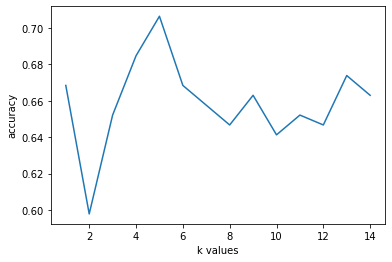

In [22]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [42]:
from sklearn.neighbors import KNeighborsClassifier
k =3

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {}".format(k,knn.score(x_test,y_test)))

knn_score = knn.score(x_test,y_test)

 3 nn score: 0.6521739130434783


In [ ]:
from sklearn.metrics import confusion_matrix
y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)

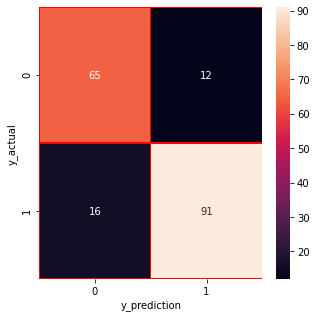

In [26]:
# Heatmap visualization of cunfusion matrix of the KNN Classification Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [27]:
# Build Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

dt_score=dt.score(x_test,y_test)

score:  0.7880434782608695


In [28]:
# Here we use confusion matrix to evaluate the Decision Tree Classification Model
from sklearn.metrics import confusion_matrix
y_prediction = dt.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

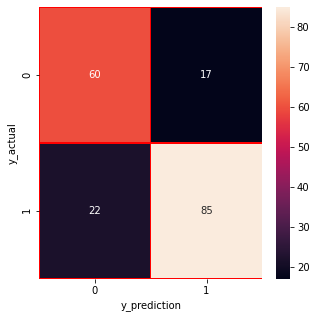

In [29]:
# Heatmap visualization of cunfusion matrix of the Decision Tree Classification Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))
rf_score = rf.score(x_test,y_test)

random forest algo result:  0.8641304347826086


In [44]:
from sklearn.metrics import confusion_matrix
y_prediction = rf.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

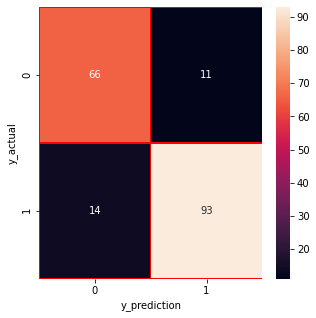

In [32]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [33]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
# prediction and accuracy 
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

svm_score = svm.score(x_test,y_test)

print accuracy of svm algo:  0.6847826086956522


In [45]:
from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

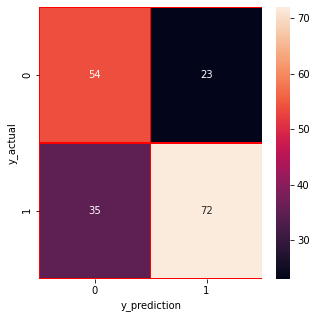

In [35]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [36]:
# Build Naive Bayes Classification Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
 
print("Accuracy of naive bayes algo: ",nb.score(x_test,y_test))

nb_score = nb.score(x_test,y_test)

Accuracy of naive bayes algo:  0.842391304347826


In [37]:
# Here we use confusion matrix to evaluate the Support Vector Machine Model
from sklearn.metrics import confusion_matrix
y_prediction = nb.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

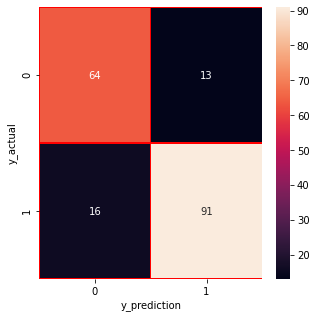

In [38]:
# Heatmap visualization of cunfusion matrix of the Support Vector Machine Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

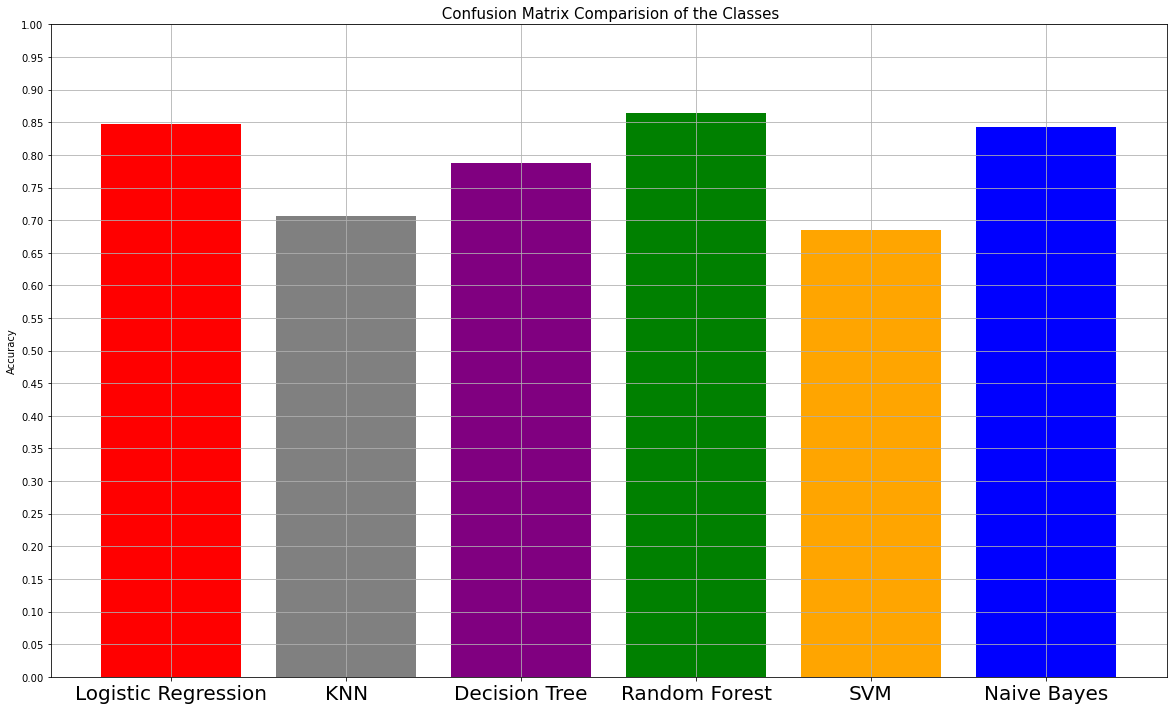

In [39]:
class_name = ("Logistic Regression","KNN","Decision Tree","Random Forest","SVM","Naive Bayes")
class_score = (lr_score,knn_score,dt_score,rf_score,svm_score,nb_score)
y_pos= np.arange(len(class_score))
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(20,12))
plt.bar(y_pos,class_score,color=colors)
plt.xticks(y_pos,class_name,fontsize=20)
plt.yticks(np.arange(0.00, 1.05, step=0.05))
plt.ylabel('Accuracy')
plt.grid()
plt.title(" Confusion Matrix Comparision of the Classes",fontsize=15)
plt.savefig('graph.png')
plt.show()